# Title

## Introduction
Bike sharing has become a widely adopted means of transportation in urban areas, with its usage varying based on several factors such as seasons, working days versus holidays, and temperature. The Bike Sharing Dataset available in the UCI Machine Learning Repository encompasses data from 2011 to 2012, detailing the hourly and daily counts of rental bikes in the Capital bike share system, along with corresponding weather and seasonal information. This dataset serves as a valuable resource for examining the impact of these factors on the demand for bike sharing.

Seasons play a significant role in bike sharing usage, as people tend to be more inclined to ride bikes during warmer months. Moreover, the distinction between working days and holidays can also influence bike sharing demand, as people's transportation needs differ on these occasions. Additionally, temperature emerges as a crucial factor affecting bike sharing usage; extreme heat or cold may deter people from opting for bikes.

In conclusion, the Bike Sharing Dataset provides essential insights into how seasons, working days versus holidays, and temperature can influence bike sharing demand. Analyzing this data enables us to gain a deeper understanding of the factors influencing bike sharing usage and offers valuable information for enhancing bike sharing systems to better cater to user needs.

## Preliminary Results

First we install the packages we need to read, clean and wrangle, and plot our data.

In [25]:
library(tidyverse)
library(repr)
library(infer)

We uploaded the dataset from https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset to our project repository to read it from the web into R.

In [26]:
bike_day_data <- read_csv("https://raw.githubusercontent.com/megannma/stat-201-2023s2-group-10/main/day.csv")
head(bike_day_data)

Rows: 731 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


We clean and wrangle our data into a tidy format by only selecting the variables we need and converting their values into factors.

In [27]:
selected_bike_day_data <-
    bike_day_data %>%
    select(season, workingday, temp, casual, registered, cnt) %>%
    mutate(season = as.factor(season), workingday = as.factor(workingday))
head(selected_bike_day_data)

season,workingday,temp,casual,registered,cnt
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.344167,331,654,985
1,0,0.363478,131,670,801
1,1,0.196364,120,1229,1349
1,1,0.200000,108,1454,1562
1,1,0.226957,82,1518,1600
1,1,0.204348,88,1518,1606


Our first plot is a bar plot of the total number users for each season:

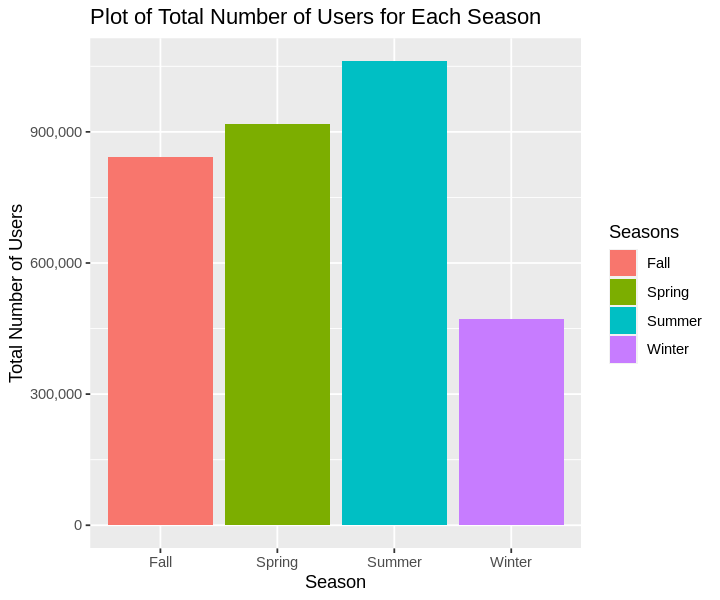

In [52]:
options(repr.plot.width = 6, repr.plot.height = 5)

season_plot <-
    selected_bike_day_data %>%
    group_by(season) %>%
    summarize(sum_cnt = sum(cnt)) %>%
    mutate(season = c("Winter", "Spring", "Summer", "Fall")) %>%
    ggplot(aes(x = season, y = sum_cnt, fill = season)) +
        geom_bar(stat = "identity") +
        labs(x = "Season", y = "Total Number of Users", fill = "Seasons") +
        scale_y_continuous(labels = scales::comma_format()) +
        ggtitle("Plot of Total Number of Users for Each Season")
season_plot

Our second plot is a bar plot of users on working days vs. non working days:

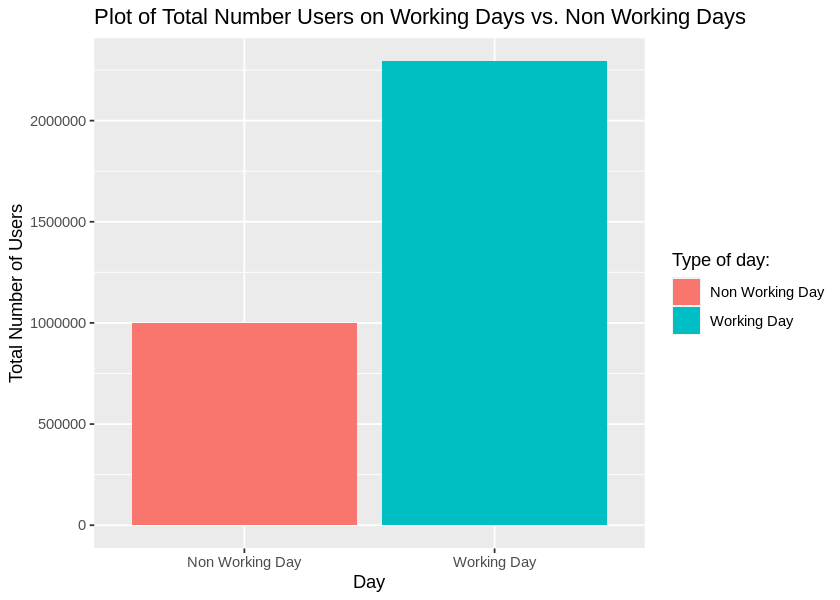

In [53]:
options(repr.plot.width = 7, repr.plot.height = 5)
workingday_plot <-
    selected_bike_day_data %>%
    group_by(workingday) %>%
    summarize(sum_cnt = sum(cnt)) %>%
    mutate(workingday = c("Non Working Day", "Working Day")) %>%
    ggplot(aes(x = workingday, y = sum_cnt, fill = workingday)) +
        geom_bar(stat = "identity") +
        labs(x = "Day", y = "Total Number of Users", fill = "Type of day:") +
        ggtitle("Plot of Total Number Users on Working Days vs. Non Working Days")

workingday_plot

Our third plot is a scatterplot of users vs. temperature in normalized degrees Celsius:

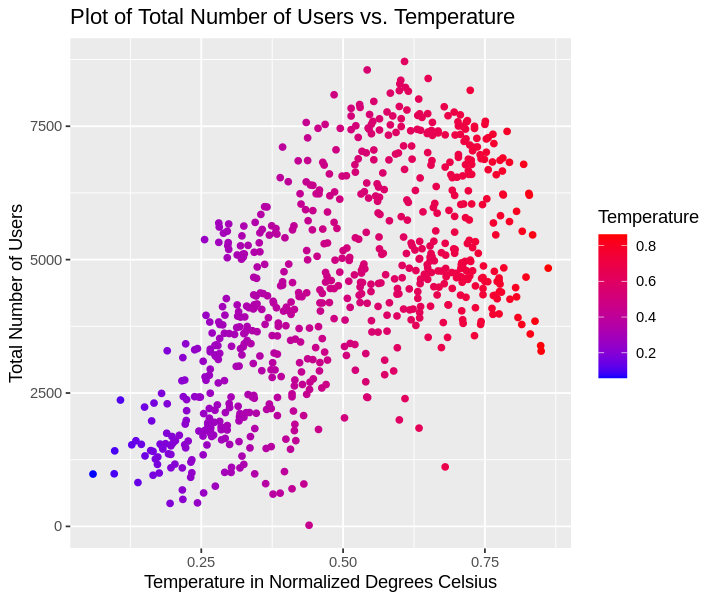

In [54]:
options(repr.plot.width = 6, repr.plot.height = 5)
temp_plot <-
    selected_bike_day_data %>%
    ggplot(aes(x = temp, y = cnt, color = temp)) +
        geom_point() +
        labs(x = "Temperature in Normalized Degrees Celsius", y = "Total Number of Users", color = 'Temperature') +
        scale_color_gradient(low = "blue", high = "red") +
        ggtitle("Plot of Total Number of Users vs. Temperature")
temp_plot

Now we compute the estimates of our parameters: the proportion of active users for each season and the mean total users for working days vs. non working days.

In [7]:
# Compute the total count of total users for the dataset
total_cnt <- sum(selected_bike_day_data$cnt)
# Compute the proportion of active users for each season
props <-
    selected_bike_day_data %>%
    group_by(season) %>%
    summarize(prop = sum(cnt)/total_cnt) %>%
    mutate(season = c("Winter", "Spring", "Summer", "Fall"))
# Compute the mean total users for working days vs. non working days
means <-
    selected_bike_day_data %>%
    group_by(workingday) %>%
    summarize(mean = mean(cnt)) %>%
    mutate(workingday = c("Non Working Day", "Working Day"))
props
means

season,prop
<chr>,<dbl>
Winter,0.1431503
Spring,0.2789792
Summer,0.3222692
Fall,0.2556013


workingday,mean
<chr>,<dbl>
Non Working Day,4330.169
Working Day,4584.820


## Methods: Plan
The dataset we are using comes from Capital bikeshare system, which is one of the biggest bike rental companies. This ensures that we have a large enough sample size in order to conduct our study and allows us to generate results that are more trustworthy and more representative of a larger population. The data is also sufficiently recent for us to draw conclusions to our questions.

We have also generated graphs and tables of values for each of the questions we are investigating in: Season vs Total Number of Users; Working/Non-working Days vs Total Number of Users; and Temperature vs Total Number of Users. The graphs display the differences in total number of users between the variables we are testing.

Although the plots give us a general idea on the effect each variable has on the number of users, it is not enough to give to a stakeholder. We do not have enough evidence to be making conclusions about our studies to provide them to other people, as it may cause a loss of profit or insufficient bike supplies.
 - For the first question (season vs users), there does not seem to be a significant gap between some of the seasons, for example, between fall and spring or between spring and winter. We can use a T Test or Proportion Test to find if there are significant differences in users between summer and winter seasons. We can also generate a confidence interval for the difference in mean users between two seasons and see whether it captures 0 or not.
 - For the second question (working/non-working days vs users), there is a big difference between working and non-working days when we look at the graph, since it shows total number of users and there are more working days than non-working days in our sample, but when we compare the mean number of users, the statistics are actually quite similar. So again, we can use a T Test to check if there is a significant difference between the number of users on working days and number of users on non-working days.
 - For the third question (temperature vs users), the plot does not give us a clear idea on the relationship between temperature and amount of users. We can see a weak trend from the scatterplot, as temperature increases, the number of users also increases, but the trend seems to reverse when we get to higher temperatures, the trend looks to be declining. So we should also conduct a test to determine if there are any correlations between temperature and amount of users.


#### What do you expect to find?

Based on the observations, we might expect to find that there are no significant differences in the total number of users between some seasons (e.g., fall and spring or spring and winter), but there could be a significant difference in users between summer and winter seasons. Aditionally, we might expect to find that there is a substantial difference in the total number of users between working and non-working days based on the graph. However, further statistical analysis may reveal that the mean number of users is not significantly different between the two groups, or between seasons. Lastly, based on the scatterplot, we might expect to find a weak positive correlation between temperature and the number of users, and the statistical test can help us confirm the presence and strength of this correlation.
#### What impact could such findings have?

The findings could inform the bike rental company about the seasonal variations in user demand. If there is a significant difference in users between summer and winter, it could help the company better allocate resources, such as bikes and staff to meet the varying demand throughout the year. Understanding the differences in bike usage patterns between working and non-working days can help the company optimize bike distribution on a more micro level. Lastly, understanding the relationship between temperature and user demand can help the company prepare for seasonal fluctuations and optimize bike availability accordingly, possibly avoiding unnecessary costs and increasing profits overall.  
#### What future questions could this lead to?

The study could lead to further investigation into the factors contributing to the differences in users between specific seasons, such as prompting questions about marketing strategies, weather patterns, or seasonal events that influence user behavior. The study could prompt further investigation into why there is a substantial difference in the total number of users between the two groups (working/non-working days), even though the mean number of users is similar. Are there specific time periods on working days when usage peaks, and what factors might be driving this?

## References
1. El-Assi, W., Salah Mahmoud, M. & Nurul Habib, K. Effects of built environment and weather on bike sharing demand: a station level analysis of commercial bike sharing in Toronto. Transportation 44, 589–613 (2017). https://doi.org/10.1007/s11116-015-9669-z
2. UCI Machine Learning Repository: Bike Sharing Dataset. https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset